<a href="https://colab.research.google.com/github/dnzambuli/Deep-learning-4-CV/blob/master/Project/Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Image Segmentation for Disease Diagnosis

## The Data
SIPaKMeD Database

## Data Description
The SIPaKMeD Database consists of 4049 images of isolated cells that have been manually cropped from 966 cluster cell images of Pap smear slides. These images were acquired through a CCD camera adapted to an optical microscope. The cell images are divided into five categories containing normal, abnormal and benign cells.

## Data Source
https://www.cse.uoi.gr/~marina/sipakmed.html
4
# Reference
Marina E. Plissiti, Panagiotis Dimitrakopoulos, Giorgos Sfikas, Christophoros Nikou, Olga Krikoni, Antonia

&emsp;&emsp;Charchanti, SIPAKMED: A new dataset for feature

&emsp;&emsp;and image based classification of normal and pathological cervical cells in Pap smear images, IEEE

&emsp;&emsp;International Conference on Image Processing (ICIP) 2018, Athens, Greece, 7-10 October 2018.

# Task Requirements

## Context Example
Malaria is a leading cause of death in Africa. Many **rural clinics** lack advanced diagnostic tools. AI-powered **microscopy image segmentation** can help detect **malaria parasites in blood smears**, reducing misdiagnosis.

## Objective:
Train a **U-Net model** to segment malaria-infected blood cells from microscopic images

## Steps:
1. **Dataset:** Use the NIH malaria dataset or collect labeled blood smear images.
2. **Preprocessing:** Convert images to grayscale, normalize pixel values.
3. **Train U-Net Model:** Use U-Net for cell segmentation.
4. **Evaluation:** Measure IoU (Intersection over Union) and Dice Score.

## Real-World Impact:
✅ Provides AI-assisted malaria diagnosis for rural clinics.

✅ Reduces human error in manual microscopy diagnosis.

✅ Helps doctors prioritize high-risk patients.

## Assesment Rubric

|Criteria| Description| Marks|
|:----|:----|:----|
|Dataset Preparation| Handling of malaria microscopy images| 20|
|Model Implementation| Training U-Net for segmentation| 25|
|Performance| Evaluation IoU, Dice Score| 20|
|Code Documentation| Structured and well-commented code| 15|
|Report & Visualization| Accuracy analysis and segmentation results| 20|

In [1]:
# getting the files using wget



# !wget https://www.cse.uoi.gr/~marina/SIPAKMED/im_Superficial-Intermediate.7z
# !wget https://www.cse.uoi.gr/~marina/SIPAKMED/im_Parabasal.7z
# !wget https://www.cse.uoi.gr/~marina/SIPAKMED/im_Koilocytotic.7z
# !wget https://www.cse.uoi.gr/~marina/SIPAKMED/im_Metaplastic.7z
# !wget https://www.cse.uoi.gr/~marina/SIPAKMED/im_Dyskeratotic.7z

# 1. Download the data from source

In [2]:
# function that can download .7z data and extract it into folders of the name passed into the function.
import subprocess
import os
import urllib.request

def download_7z(source_url, save_directory_name):
  """
  Downloads a .7z file from a given URL and extracts it into a folder
  with the specified name.

  Args:
    source_url: The URL of the .7z file to download.
    save_directory_name: The name of the directory to create and extract
                         the contents of the .7z file into.
  """

  # Create the directory if it doesn't exist
  if not os.path.exists(save_directory_name):
    os.makedirs(save_directory_name)

  # Download the .7z file
  file_name = os.path.basename(source_url)
  file_path = os.path.join(save_directory_name, file_name)
  urllib.request.urlretrieve(source_url, file_path)

  # Extract the .7z file using 7z
  try:
    subprocess.run(['7z', 'x', file_path, f'-o{save_directory_name}'], check=True)
    print(f"Successfully downloaded and extracted {source_url} to {save_directory_name}")
  except FileNotFoundError:
    print("7z is not installed. Please install 7z and try again.")
  except subprocess.CalledProcessError as e:
    print(f"Error extracting the file: {e}")


# downloading
download_7z("https://www.cse.uoi.gr/~marina/SIPAKMED/im_Superficial-Intermediate.7z", "Superficial-Intermediate")
download_7z("https://www.cse.uoi.gr/~marina/SIPAKMED/im_Parabasal.7z", "Parabasal")
download_7z("https://www.cse.uoi.gr/~marina/SIPAKMED/im_Koilocytotic.7z", "Koilocytotic")
download_7z("https://www.cse.uoi.gr/~marina/SIPAKMED/im_Metaplastic.7z", "Metaplastic")
download_7z("https://www.cse.uoi.gr/~marina/SIPAKMED/im_Dyskeratotic.7z", "Dyskeratotic")


Successfully downloaded and extracted https://www.cse.uoi.gr/~marina/SIPAKMED/im_Superficial-Intermediate.7z to Superficial-Intermediate
Successfully downloaded and extracted https://www.cse.uoi.gr/~marina/SIPAKMED/im_Parabasal.7z to Parabasal
Successfully downloaded and extracted https://www.cse.uoi.gr/~marina/SIPAKMED/im_Koilocytotic.7z to Koilocytotic
Successfully downloaded and extracted https://www.cse.uoi.gr/~marina/SIPAKMED/im_Metaplastic.7z to Metaplastic
Successfully downloaded and extracted https://www.cse.uoi.gr/~marina/SIPAKMED/im_Dyskeratotic.7z to Dyskeratotic


# 2. Examine unique file types in the folders

sample idea for reading the filenames

```python
def get_main_file_types_in_folders(root_folder):
  """
  Reads the main file type in each folder within the specified root folder.

  Args:
    root_folder: The path to the root folder containing the subfolders.

  Returns:
    A dictionary where keys are folder names and values are the most frequent file extension.
  """

  folder_file_types = defaultdict(lambda: defaultdict(int))

  for folder_name in os.listdir(root_folder):
    folder_path = os.path.join(root_folder, folder_name)
    if os.path.isdir(folder_path):
      for filename in os.listdir(folder_path):
        _, file_extension = os.path.splitext(filename)
        if file_extension:
          folder_file_types[folder_name][file_extension.lower()] += 1

  main_file_types = {}
  for folder_name, file_type_counts in folder_file_types.items():
    if file_type_counts:
      most_frequent_file_type = max(file_type_counts, key=file_type_counts.get)
      main_file_types[folder_name] = most_frequent_file_type

  return main_file_types
```

In [3]:
# function to read the main file type in each folder like: .bat, .jpg, ...

from collections import defaultdict

def get_main_file_types_in_folders(root_folder_path):
    """
    Reads the main file type in the folder named 'im_[root_folder_path]', excluding any .7z archives.

    Args:
        root_folder_path (str): The base folder name.

    Returns:
        A string representing the most frequent file extension in 'im_[root_folder_path]', or None if empty.
    """

    # Construct the folder name
    folder_name = f"{root_folder_path}/im_{root_folder_path}" # after finding out the links bring back a sub .7z archive

    if not os.path.exists(folder_name) or not os.path.isdir(folder_name):
        print(f"Folder '{folder_name}' does not exist or is not a directory.")
        return None

    file_type_counts = defaultdict(int)

    for filename in os.listdir(folder_name):
        file_path = os.path.join(folder_name, filename)

        # Ensure it's a file and not a directory
        if os.path.isfile(file_path):
            _, file_extension = os.path.splitext(filename)

            # Ignore empty extensions (folders, hidden files, etc.) and .7z archives
            if file_extension and file_extension.lower() != ".7z":
                file_type_counts[file_extension.lower()] += 1

    # Determine the most frequent file extension
    if file_type_counts:
        return file_type_counts
    else:
        return None  # Return None if no valid files were found

# Example usage:
root_folder_path = ["Superficial-Intermediate", "Parabasal", "Koilocytotic", "Metaplastic", "Dyskeratotic"]
for folder in root_folder_path:
  print(f"Main file type in {folder}: {get_main_file_types_in_folders(folder)}")


Main file type in Superficial-Intermediate: defaultdict(<class 'int'>, {'.dat': 1662, '.bmp': 126})
Main file type in Parabasal: defaultdict(<class 'int'>, {'.dat': 1574, '.bmp': 108})
Main file type in Koilocytotic: defaultdict(<class 'int'>, {'.dat': 1650, '.bmp': 238})
Main file type in Metaplastic: defaultdict(<class 'int'>, {'.dat': 1586, '.bmp': 271})
Main file type in Dyskeratotic: defaultdict(<class 'int'>, {'.dat': 1626, '.bmp': 223})


# 3. Data Description

The data appears as a

bmp -- the image
dat -- the regions within the image data that have a specific image

## 3.1 Sample illustration

Initial idea

**drawing a rectangle**

```python
def display_borders_from_dat(image_path, dat_path):
    """
    Displays the borders of regions identified in a .dat file on the corresponding .bmp image.

    Args:
        image_path: Path to the .bmp image file.
        dat_path: Path to the .dat file containing region information.
    """

    try:
        # Load the image
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error loading image: {image_path}")
            return

        # Load the .dat file
        with open(dat_path, 'r') as f:
            lines = f.readlines()

        # Process the .dat file to get region coordinates (assuming a specific format)
        # Adjust this part based on the actual format of your .dat file
        regions = []
        for line in lines:
            parts = line.strip().split()
            if len(parts) >= 4:
                try:
                    x1, y1, x2, y2 = map(int, parts[:4])
                    regions.append((x1, y1, x2, y2))
                except ValueError:
                    print(f"Skipping invalid line: {line.strip()}")

        # Draw borders on the image
        for x1, y1, x2, y2 in regions:
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Red border, thickness 2

        # Display the image with borders in Google Colab
        cv2_imshow(image)

    except Exception as e:
        print(f"Error processing files: {e}")
```

## 3.2 The rectangle failed as .dat files seem to illustrate a polygon

example of `001_cyt01.dat`

```dat
801.25,776.25
820.25,766.25
829.75,754.75
841.75,741.25
846.75,721.25
849.25,708.75
855.25,700.25
853.75,690.25
839.75,691.75
824.25,694.25
810.25,693.25
800.75,687.75
788.25,691.75
776.75,699.25
772.75,709.25
770.25,721.25
767.25,734.75
768.25,748.75
770.75,765.25
779.75,776.25
792.75,778.25
801.25,776.25
```

Polygon Points: [(1164, 873), (1141, 865), (1118, 862), (1102, 860), (1088, 864), (1074, 860), (1071, 856), (1056, 861), (1045, 872), (1036, 875), (1019, 868), (1007, 864), (997, 853), (984, 841), (983, 828), (983, 816), (992, 810), (994, 795), (988, 782), (991, 771), (990, 757), (999, 746), (1000, 715), (1011, 683), (1024, 657), (1035, 628), (1049, 597), (1054, 581), (1056, 551), (1057, 541), (1081, 533), (1105, 530), (1111, 514), (1150, 509), (1167, 512), (1174, 525), (1177, 530), (1191, 521), (1213, 521), (1228, 527), (1244, 540), (1262, 553), (1278, 564), (1301, 580), (1315, 591), (1337, 596), (1351, 611), (1362, 647), (1371, 675), (1376, 691), (1362, 703), (1355, 712), (1348, 722), (1349, 744), (1341, 754), (1337, 768), (1332, 780), (1337, 795), (1327, 801), (1314, 812), (1313, 824), (1309, 837), (1300, 857), (1285, 880), (1253, 890), (1213, 889), (1185, 879), (1164, 873)]


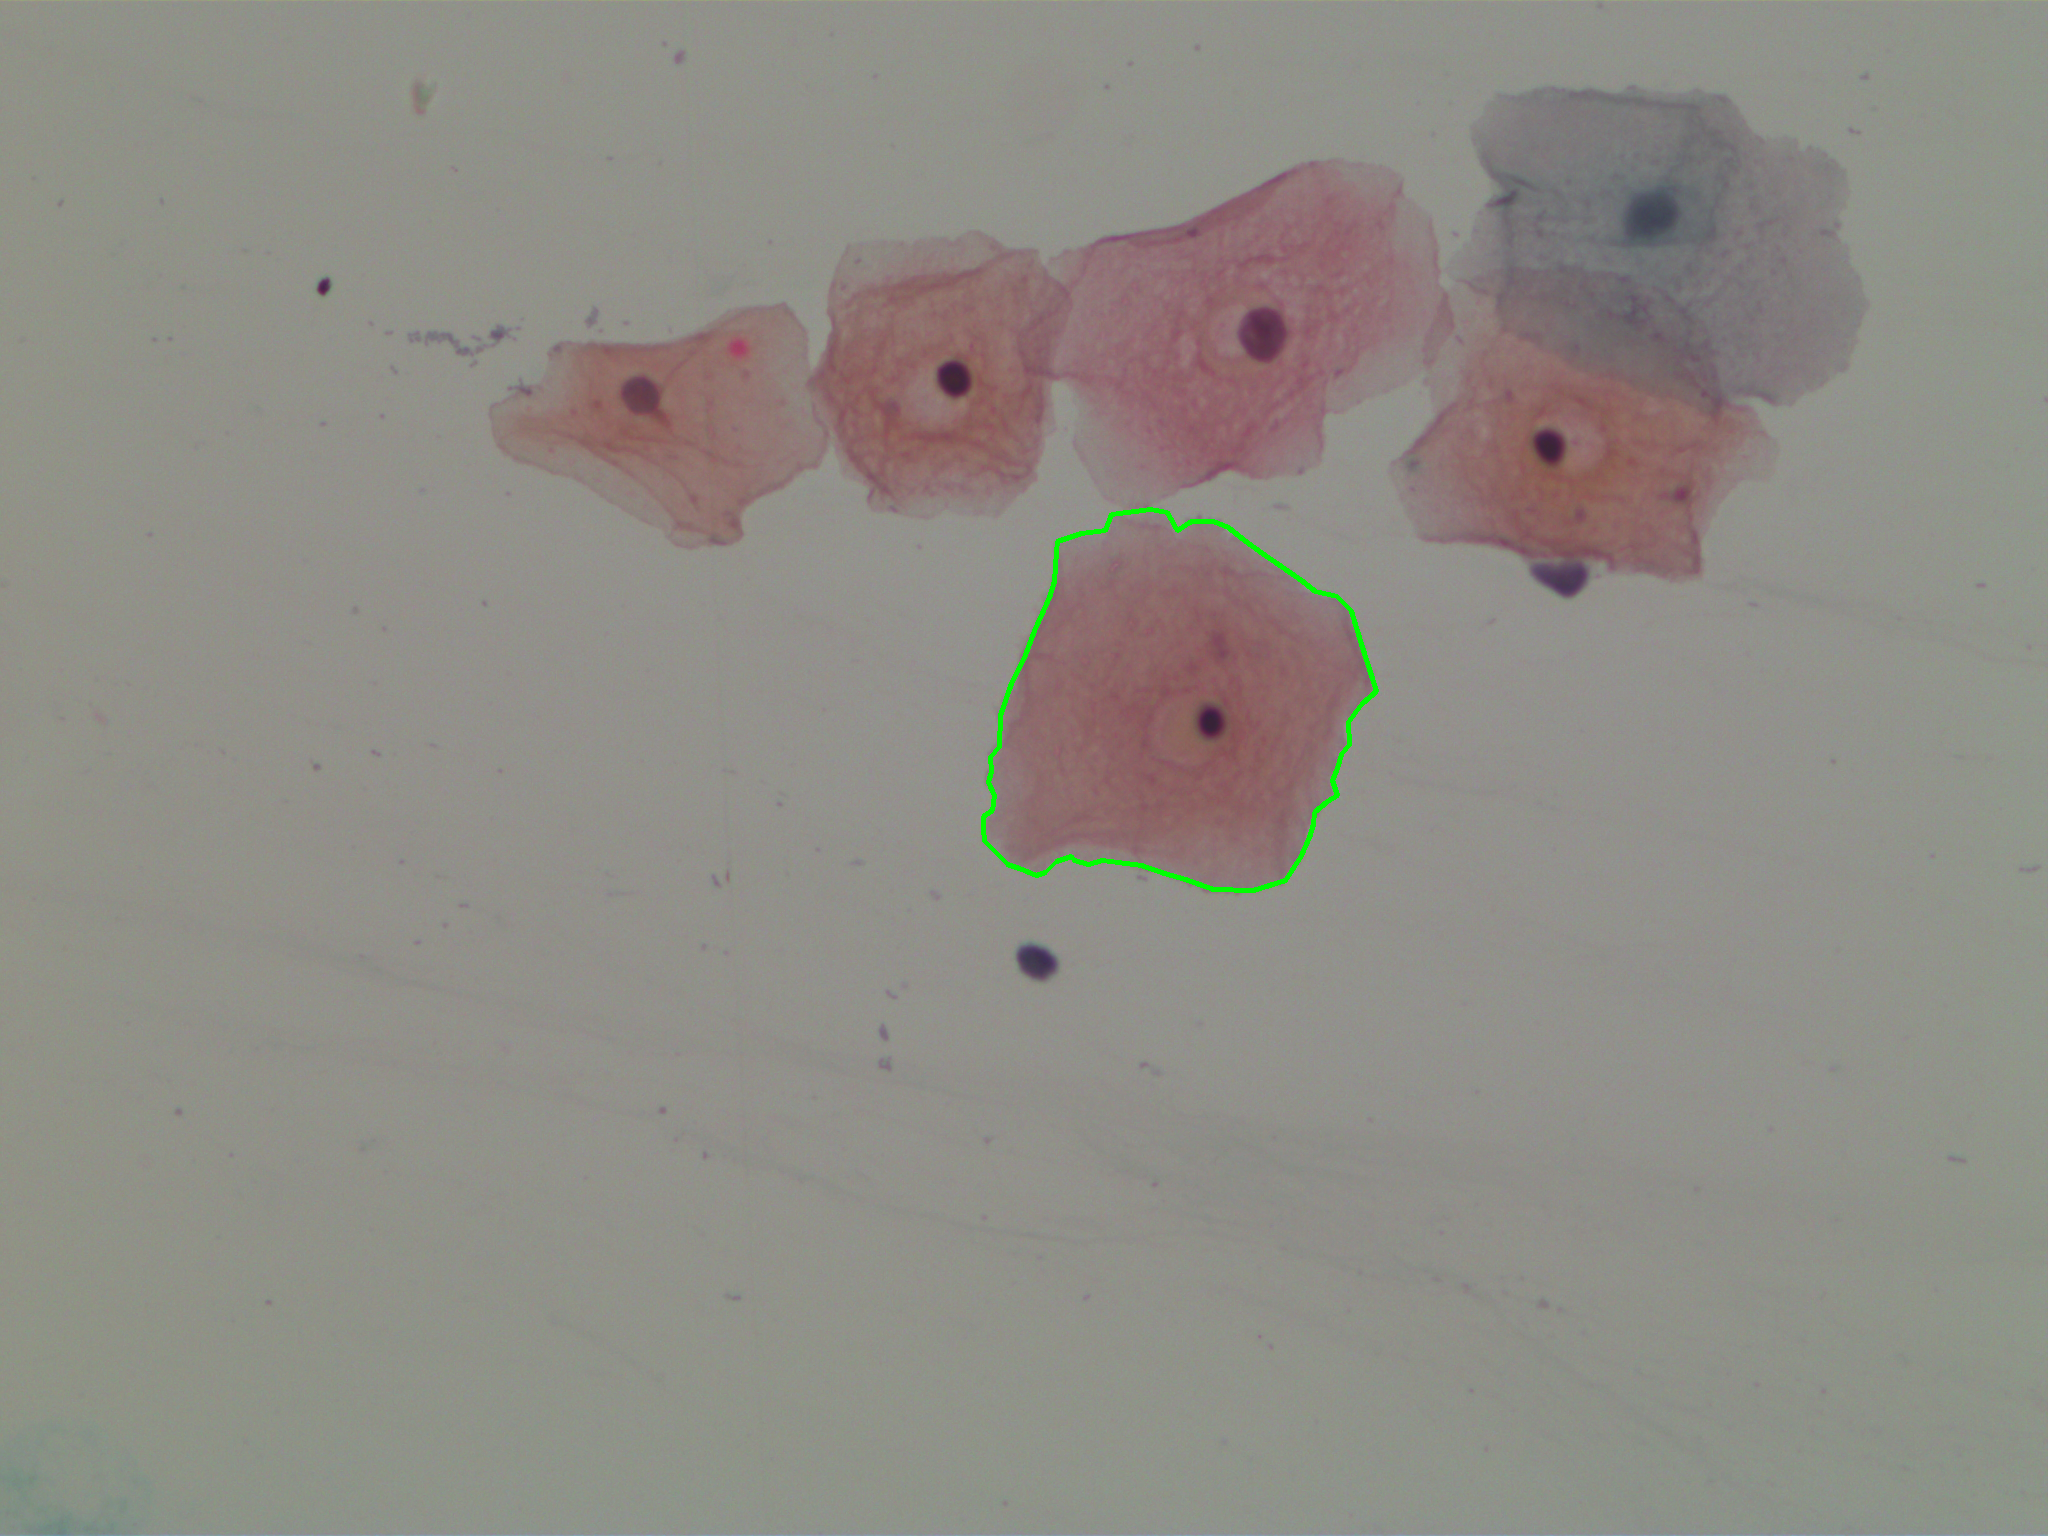

In [4]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np


def display_polygon_from_dat(image_path, dat_path):
    """
    Displays the borders of a region identified in a .dat file as a polygon on a .bmp image.

    Args:
        image_path: Path to the .bmp image file.
        dat_path: Path to the .dat file containing polygon points.
    """

    try:
        # Load the image
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error loading image: {image_path}")
            return

        # Load the .dat file
        with open(dat_path, 'r') as f:
            lines = f.readlines()

        # Process the .dat file to get polygon coordinates
        polygon_points = []
        for line in lines:
            parts = line.strip().split(',')
            if len(parts) == 2:
                try:
                    x, y = map(float, parts)  # Convert to float since values have decimals
                    polygon_points.append((int(x), int(y)))  # Convert to integers for OpenCV
                except ValueError:
                    print(f"Skipping invalid line: {line.strip()}")
        print(f"Polygon Points: {polygon_points}")

        # Convert list to numpy array and reshape for OpenCV
        polygon_np = np.array(polygon_points, np.int32).reshape((-1, 1, 2))

        # Draw the polygon on the image
        cv2.polylines(image, [polygon_np], isClosed=True, color=(0, 255, 0), thickness=3)

        # Display the image with the drawn polygon
        cv2_imshow(image)

    except Exception as e:
        print(f"Error processing files: {e}")


# Example usage:
# Assuming you have a folder with .bmp and .dat files
# image_folder = "/content/Superficial-Intermediate/im_Superficial-Intermediate"
# for filename in os.listdir(image_folder):
#     if filename.endswith(".bmp"):
#         image_path = os.path.join(image_folder, filename)
#         dat_path = os.path.join(image_folder, filename[:-4] + ".dat")  # Replace ".bmp" with ".dat"
#         if os.path.exists(dat_path):
#             display_borders_from_dat(image_path, dat_path)

crop_root_path = "/content/Superficial-Intermediate/im_Superficial-Intermediate"
image_path = f"{crop_root_path}/001.bmp"
dat_path = f"{crop_root_path}/001_cyt01.dat"
display_polygon_from_dat(image_path, dat_path)

# 4. Labeling the data

original data is in the format:

- Image .bmp
- cell border _cyt[int].dat
- cell nucleus _nuc[int].dat

target data will be in the format

- green bordered cell with blue bordered nucleus
- a label dataset with the cell type data

## 4.1 About Cell types

1. **Superficial-Intermediate cells** - They constitute the majority of the cells found in a Pap test. Usually they are flat with round, oval or polygonal shape cytoplasm stains mostly eosinophilic or cyanophilic. They contain a central pycnotic nucleus. They have well defined, large polygonal cytoplasm and easily recognized nuclear limits (small pycnotic in the superficial and vesicular nuclei in intermediate cells). These type of cells show the characteristics morphological changes (koilocytic atypia) due to more severe lessions.

2. **Parabasal cells** - Parabasal cells are immature squamous cells and they are the smallest epithelial cells seen on a typical vaginal smear. The cytoplasm is generally cyanophilic and they usually contain a large vesicular nucleus. It must be noted that parabasal cells have similar morphological characteristic with the cells identified as metaplastic cells and it is difficult to be distinguished from them.

3. **Koilocytotic cells** - These cells correspond most commonly in mature squamous cells (intermediate and superficial) and some times in metaplastic type koilocytotic cells. They appear most often cyanophilic, very lightly stained and they are characterized by a large perinuclear cavity. The periphery of the cytoplasm is very dense stained. The nuclei of koilocytes are usually enlarged, eccentrically located, hyperchromatic and exhibit irregularity of the nuclear membrane contour.

4. **Dysketarotic cells** - They are squamous cells which undergone premature abnormal keratinization within individual cells or more often in three-dimensional clusters. They exhibit a brilliant orangeophilic cytoplasm. They are characterized by the presence of vesicular nuclei, identical to the nuclei of koilcytotic cells. In many cases there are binucleated and/or multinucleated cells.

5. **Metaplastic Cells** - They are in essence small or large parabasal-type cells with prominent cellular borders, often exhibiting eccentric nuclei and sometimes containing a large intracellular vacuole. The staining in the center portion is usually light brown and it often differs from that in the marginal portion. Also, there is essentially a darker-stained cytoplasm and they exhibit great uniformity of size and shape compared to the parabasal cells, as their characteristic is the well defined, almost round shape of cytoplasm.

## Simplified explanation

1. **Superficial & Intermediate Cells** – These are the most common cells found in a Pap test. They are large, flat, and have well-defined edges. Their center contains a small, dark nucleus. In certain conditions, they may show changes (koilocytosis) that indicate more serious abnormalities.

2. **Parabasal Cells** – These are immature cells, smaller than superficial and intermediate cells. They have a round shape with a large, light-colored nucleus. They look similar to another type of cell called metaplastic cells, making them difficult to tell apart.

3. **Koilocytotic Cells** – These are squamous (flat) cells that have a distinct appearance due to viral infection, often linked to HPV. They have a clear area around the nucleus (perinuclear cavity), and their edges stain darker. The nucleus is usually larger and irregular.

4. **Dyskeratotic Cells** – These are squamous cells that have started abnormal early keratinization (a process where cells become tough and die off). They often clump together and stain bright orange. Their nuclei look similar to those in koilocytotic cells, and sometimes they have more than one nucleus.

5. **Metaplastic Cells** – These cells are transitioning from one type to another, often appearing similar to parabasal cells but with clearer borders and a more even, rounded shape. They sometimes have a large vacuole (empty space) inside and stain darker at the edges than in the center.

In [5]:
import re

def cell_bind(data_folder):
    """
    Identifies and pairs each .bmp image with its corresponding _cyt_ (cell wall) and _nuc_ (nucleus) .dat files.

    Args:
        data_folder (str): Path to the folder containing .bmp and .dat files.

    Returns:
        dict: A dictionary mapping each .bmp image to its corresponding _cyt_ and _nuc_ .dat files.
    """
    cell_region = {}

    # List all files in the folder
    all_files = os.listdir(data_folder)

    # Find all BMP images
    bmp_files = [f for f in all_files if f.endswith(".bmp")]

    # Find matching cyt and nuc dat files
    cyt_files = {re.search(r"(\d+)_cyt\d*_.dat", f): f for f in all_files if "_cyt" in f and f.endswith(".dat")}
    nuc_files = {re.search(r"(\d+)_nuc\d*_.dat", f): f for f in all_files if "_nuc" in f and f.endswith(".dat")}

    for bmp in bmp_files:
        match = re.search(r"(\d+)", bmp)
        if match:
            num = match.group(1)
            cyt_file = cyt_files.get(re.search(rf"{num}_cyt\d*_.dat", "_".join(cyt_files.values())), None)
            nuc_file = nuc_files.get(re.search(rf"{num}_nuc\d*_.dat", "_".join(nuc_files.values())), None)

            if cyt_file and nuc_file:
                cell_region[bmp] = (cyt_file, nuc_file)

    return cell_region

In [6]:
def crop_img(root_folder, cell_region):
    """
    Crops an image based on the cell_wall and marks the nucleus with a green circle.

    Args:
        root_folder (str): The main folder containing images.
        cell_region (dict): Dictionary mapping .bmp images to corresponding .dat files.

    The cropped images are stored in 'cropped/' inside the root folder.
    """

    cropped_folder = os.path.join(root_folder, "CROPPED")
    os.makedirs(cropped_folder, exist_ok=True)

    for bmp_file, (cyt_dat, nuc_dat) in cell_region.items():
        image_path = os.path.join(root_folder, bmp_file)
        cyt_path = os.path.join(root_folder, cyt_dat)
        nuc_path = os.path.join(root_folder, nuc_dat)

        # Load image
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error: Cannot load {image_path}")
            continue

        # Read cell wall coordinates
        cell_wall_points = []
        with open(cyt_path, "r") as f:
            for line in f:
                parts = line.strip().split(',')
                if len(parts) == 2:
                    x, y = map(float, parts)
                    cell_wall_points.append((int(x), int(y)))

        if not cell_wall_points:
            print(f"Skipping {bmp_file} - No cell wall detected")
            continue

        # Convert cell wall points to numpy array
        cell_wall_np = np.array(cell_wall_points, np.int32).reshape((-1, 1, 2))

        # Create a mask for cropping
        mask = np.zeros(image.shape[:2], dtype=np.uint8)
        cv2.fillPoly(mask, [cell_wall_np], 255)

        # Apply mask
        cropped_image = cv2.bitwise_and(image, image, mask=mask)

        # Read nucleus coordinates and draw circle
        with open(nuc_path, "r") as f:
            for line in f:
                parts = line.strip().split(',')
                if len(parts) == 2:
                    x, y = map(float, parts)
                    center = (int(x), int(y))
                    cv2.circle(cropped_image, center, 10, (0, 255, 0), 2)  # Green circle

        # Save cropped image
        save_path = os.path.join(cropped_folder, bmp_file)
        cv2.imwrite(save_path, cropped_image)
        print(f"Saved cropped image: {save_path}")

In [7]:
def process_files_in_folders(root_folder_path_list):
    """
    Loops through folders in the provided list, identifies .dat and .bmp files in 'im_' subfolders, and applies the cell_bind function.

    Args:
        root_folder_path_list (list): A list of root folder paths to iterate through.
    """
    for root_folder_path in root_folder_path_list:
        im_folder_path = os.path.join(root_folder_path, f"im_{root_folder_path}")

        if os.path.exists(im_folder_path) and os.path.isdir(im_folder_path):
            print(f"\nProcessing folder: {im_folder_path}")

            # Identify cell regions
            cell_regions = cell_bind(im_folder_path)

            if not cell_regions:
                print(f"No valid cell regions found in {im_folder_path}. Skipping...")
                continue

            print(f"Identified {len(cell_regions)} cell regions.")

            # Process and crop images
            crop_img(im_folder_path, cell_regions)
        else:
            print(f"\nWarning: Folder {im_folder_path} does not exist or is not a directory.")


# usage
process_files_in_folders(root_folder_path)



Processing folder: Superficial-Intermediate/im_Superficial-Intermediate
Identified 126 cell regions.
Saved cropped image: Superficial-Intermediate/im_Superficial-Intermediate/CROPPED/063.bmp
Saved cropped image: Superficial-Intermediate/im_Superficial-Intermediate/CROPPED/111.bmp
Saved cropped image: Superficial-Intermediate/im_Superficial-Intermediate/CROPPED/112.bmp
Saved cropped image: Superficial-Intermediate/im_Superficial-Intermediate/CROPPED/121.bmp
Saved cropped image: Superficial-Intermediate/im_Superficial-Intermediate/CROPPED/047.bmp
Saved cropped image: Superficial-Intermediate/im_Superficial-Intermediate/CROPPED/053.bmp
Saved cropped image: Superficial-Intermediate/im_Superficial-Intermediate/CROPPED/043.bmp
Saved cropped image: Superficial-Intermediate/im_Superficial-Intermediate/CROPPED/060.bmp
Saved cropped image: Superficial-Intermediate/im_Superficial-Intermediate/CROPPED/008.bmp
Saved cropped image: Superficial-Intermediate/im_Superficial-Intermediate/CROPPED/108.bm

Polygon Points: [(91, 236), (114, 232), (136, 234), (162, 236), (184, 232), (209, 225), (242, 219), (263, 213), (288, 203), (304, 202), (328, 197), (346, 191), (358, 184), (369, 179), (378, 175), (389, 159), (397, 142), (398, 128), (392, 115), (383, 105), (362, 98), (344, 96), (329, 93), (308, 94), (296, 95), (287, 94), (275, 89), (263, 84), (251, 76), (229, 71), (215, 69), (202, 68), (185, 69), (162, 70), (143, 70), (122, 64), (105, 51), (78, 35), (60, 19), (39, 9), (30, 10), (21, 22), (13, 38), (9, 53), (9, 62), (13, 74), (20, 86), (21, 101), (24, 121), (29, 138), (30, 153), (32, 163), (34, 174), (39, 195), (44, 215), (54, 228), (70, 236), (79, 235), (91, 236)]


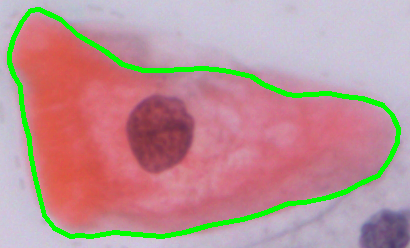

In [8]:
cropped_img_001_01 = "/content/Koilocytotic/im_Koilocytotic/CROPPED/001_01.bmp"
display_polygon_from_dat(cropped_img_001_01, f"{cropped_img_001_01[:-4]}_cyt.dat")

Polygon Points: [(159, 173), (169, 167), (179, 159), (188, 149), (193, 135), (194, 125), (191, 114), (187, 110), (183, 101), (175, 96), (166, 93), (157, 93), (146, 96), (136, 103), (128, 113), (125, 125), (125, 137), (131, 150), (137, 163), (144, 171), (149, 175), (159, 173)]


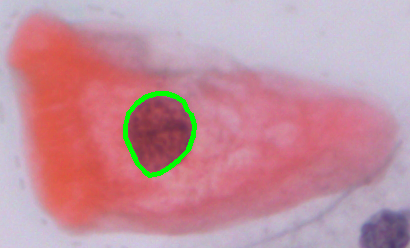

In [9]:
display_polygon_from_dat(cropped_img_001_01, f"{cropped_img_001_01[:-4]}_nuc.dat")

# Emerged Need

The data needs augmentation this is because the initial model training ended up having extremely high accuracy

```bash
Epoch 1/28
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 256, 256, 3))
  warnings.warn(msg)
61/98 ━━━━━━━━━━━━━━━━━━━━ 36:12 59s/step - accuracy: 0.9991 - loss: 0.1105
```

This is just the first epoch so the data is augmented as follows

## Augmentation process


1. Rotation $90^{\circ}$, $180^{\circ}$, $270^{\circ}$
2. Flip


In [10]:
def flip_polygon(points, flip_code, image_shape):
  """
  Flips polygon points either vertically or horizontally within an image.

  Args:
    points (list): A list of (x, y) tuples representing the polygon's vertices.
    flip_code (int): 0 for vertical flip, 1 for horizontal flip.
    image_shape (tuple): The shape of the image (height, width, ...). Used to calculate
                          the boundaries for flipping.

  Returns:
    list: A new list of (x, y) tuples representing the flipped polygon's vertices.
  """
  height, width = image_shape[:2]
  flipped_points = []

  for x, y in points:
      if flip_code == 0:  # vertical flip
          flipped_points.append((x, height - y))
      elif flip_code == 1:  # horizontal flip
          flipped_points.append((width - x, y))
  return flipped_points

def rotate_polygon(points, angle, image_shape):
    """
    Rotates polygon points around the image center by a given angle in degrees.

    Args:
        points (list): A list of (x, y) tuples representing the polygon's vertices.
        angle (float): The angle of rotation in degrees.
        image_shape (tuple): The shape of the image (height, width, ...).
                             Used to calculate the image center for rotation.

    Returns:
        list: A new list of (x, y) tuples representing the rotated polygon's vertices.
    """
    height, width = image_shape[:2]
    center = np.array([width / 2, height / 2])
    angle_rad = np.deg2rad(angle)

    # Rotation matrix (clockwise)
    rot_matrix = np.array([
        [np.cos(angle_rad), np.sin(angle_rad)],  # Note: sin signs swapped for clockwise
        [-np.sin(angle_rad), np.cos(angle_rad)]
    ])

    rotated_points = []
    for x, y in points:
        vec = np.array([x, y]) - center
        rotated_vec = rot_matrix @ vec  # Matrix multiplication
        new_point = rotated_vec + center
        rotated_points.append((new_point[0], new_point[1]))  # Keep as float

    return rotated_points


# Create new masks

In [11]:
def read_polygon_dat(dat_path):
  """
  Reads polygon coordinates from a .dat file and returns them as a list of (x, y) tuples.

  args:
    dat_path (str): Path to the .dat file containing polygon coordinates.

  returns:
    list: A list of (x, y) tuples representing the polygon's vertices.
  """
  points = []
  with open(dat_path, 'r') as f:
      for line in f:
          coords = line.strip().split(',')
          if len(coords) == 2:
              try:
                  x, y = map(float, coords)
                  points.append((int(x), int(y)))
              except ValueError:
                  continue
  return points

def write_polygon_dat(points, save_path):
  """
  Writes a list of (x, y) tuples representing polygon coordinates to a .dat file.

  args:
    points (list): A list of (x, y) tuples representing the polygon's vertices.
    save_path (str): Path to save the .dat file.

  """
  os.makedirs(os.path.dirname(save_path), exist_ok=True)
  with open(save_path, 'w') as f:
      for x, y in points:
          f.write(f"{x},{y}\n")


In [12]:
import random
def rotate_image(image, angle):
  '''
  Rotates an image by a specified angle.

  Args:
    image (numpy.ndarray): The input image to be rotated.
    angle (float): The angle of rotation in degrees.

  Returns:
    numpy.ndarray: The rotated image.
  '''
  # Calculate the center of the image.
  image_center = tuple(np.array(image.shape[1::-1]) / 2)

  # Get the rotation matrix.
  # image_center: Center of rotation.
  # angle: Rotation angle in degrees.
  # 1.0: Scale factor (1.0 means no scaling).
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)

  # Perform the affine transformation to rotate the image.
  # image: The input image.
  # rot_mat: The rotation matrix.
  # image.shape[1::-1]: Output image size (width, height).
  # flags=cv2.INTER_LINEAR: Interpolation method (linear).
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)

  # Return the rotated image.
  return result


def augment_image_and_polygons(img_path, save_dir):
    """
    Applies random flip and rotation augmentations to an image and its
    associated cytoplasm and nucleus polygons.

    Args:
        img_path (str): Path to the original image (.bmp file).
        save_dir (str): Directory to save the augmented images and .dat files.

    Returns:
        None
    """

    # --- Load image and polygons ---
    cyt_path = img_path.replace(".bmp", "_cyt.dat")
    nuc_path = img_path.replace(".bmp", "_nuc.dat")
    image = cv2.imread(img_path)

    if image is None:
        print(f"⚠️ Image not found: {img_path}")
        return

    cyt_points = read_polygon_dat(cyt_path)
    nuc_points = read_polygon_dat(nuc_path)
    base_name = os.path.splitext(os.path.basename(img_path))[0]

    # --- Random Flip (Horizontal or Vertical) ---
    flip_type = random.choice(["none", "horizontal", "vertical"])  # 3 options

    if flip_type == "horizontal":
        flipped_img = cv2.flip(image, 1)  # 1 = horizontal flip
        flipped_cyt = flip_polygon(cyt_points, 1, image.shape)
        flipped_nuc = flip_polygon(nuc_points, 1, image.shape)
        suffix = "_flipH"

    elif flip_type == "vertical":
        flipped_img = cv2.flip(image, 0)  # 0 = vertical flip
        flipped_cyt = flip_polygon(cyt_points, 0, image.shape)
        flipped_nuc = flip_polygon(nuc_points, 0, image.shape)
        suffix = "_flipV"

    else:  # No flip
        flipped_img = image
        flipped_cyt = cyt_points
        flipped_nuc = nuc_points
        suffix = ""

    if flip_type != "none":
        cv2.imwrite(os.path.join(save_dir, f"{base_name}{suffix}.bmp"), flipped_img)
        write_polygon_dat(flipped_cyt, os.path.join(save_dir, f"{base_name}{suffix}_cyt.dat"))
        write_polygon_dat(flipped_nuc, os.path.join(save_dir, f"{base_name}{suffix}_nuc.dat"))

    # --- Random Rotation ---
    angle = random.choice([0, 45, 90, 135, 180, 225, 270])
    if angle != 0:
        rotated_img = rotate_image(image, angle)
        rotated_cyt = rotate_polygon(cyt_points, angle, image.shape)
        rotated_nuc = rotate_polygon(nuc_points, angle, image.shape)

        cv2.imwrite(os.path.join(save_dir, f"{base_name}_rot{angle}.bmp"), rotated_img)
        write_polygon_dat(rotated_cyt, os.path.join(save_dir, f"{base_name}_rot{angle}_cyt.dat"))
        write_polygon_dat(rotated_nuc, os.path.join(save_dir, f"{base_name}_rot{angle}_nuc.dat"))


In [13]:
import os
import re

def augment_images_in_folders(root_folder_path_list, verbose=True):
    """
    Searches through each root folder for images inside a CROPPED subfolder
    (filenames like 001_01.bmp), applies augmentation, and saves results in AUGMENTED.

    Args:
        root_folder_path_list (list): List of root directory paths to process.
        verbose (bool): Whether to print progress messages (default: True).
    """
    # Regex pattern for files like "001_01.bmp"
    pattern = re.compile(r"^\d+_\d+\.bmp$")

    for root_folder in root_folder_path_list:
        folder_name = os.path.basename(root_folder.rstrip('/'))
        cropped_folder = os.path.join(root_folder, f"im_{folder_name}", "CROPPED")
        augmented_folder = os.path.join(root_folder, f"im_{folder_name}", "AUGMENTED")

        if not os.path.exists(cropped_folder):
            print(f"⚠️ Skipping: Cropped folder not found → {cropped_folder}")
            continue

        os.makedirs(augmented_folder, exist_ok=True)

        bmp_files = [f for f in os.listdir(cropped_folder) if pattern.match(f)]

        if not bmp_files:
            print(f"ℹ️ No matching images found in {cropped_folder}")
            continue

        if verbose:
            print(f"\n📁 Processing {len(bmp_files)} images in: {cropped_folder}")

        for filename in bmp_files:
            img_path = os.path.join(cropped_folder, filename)
            try:
                augment_image_and_polygons(img_path, augmented_folder)
                if verbose:
                    print(f"✅ Augmented: {filename}")
            except Exception as e:
                print(f"❌ Error processing {filename}: {e}")


augment_images_in_folders(root_folder_path)



📁 Processing 831 images in: Superficial-Intermediate/im_Superficial-Intermediate/CROPPED
✅ Augmented: 040_03.bmp
✅ Augmented: 037_02.bmp
✅ Augmented: 095_02.bmp
✅ Augmented: 123_02.bmp
✅ Augmented: 032_04.bmp
✅ Augmented: 057_04.bmp
✅ Augmented: 010_04.bmp
✅ Augmented: 071_07.bmp
✅ Augmented: 082_03.bmp
✅ Augmented: 106_10.bmp
✅ Augmented: 032_06.bmp
✅ Augmented: 001_01.bmp
✅ Augmented: 060_03.bmp
✅ Augmented: 024_03.bmp
✅ Augmented: 046_05.bmp
✅ Augmented: 097_11.bmp
✅ Augmented: 053_04.bmp
✅ Augmented: 094_02.bmp
✅ Augmented: 059_04.bmp
✅ Augmented: 122_06.bmp
✅ Augmented: 057_08.bmp
✅ Augmented: 030_02.bmp
✅ Augmented: 006_06.bmp
✅ Augmented: 007_12.bmp
✅ Augmented: 065_03.bmp
✅ Augmented: 027_07.bmp
✅ Augmented: 057_02.bmp
✅ Augmented: 070_03.bmp
✅ Augmented: 104_04.bmp
✅ Augmented: 124_02.bmp
✅ Augmented: 017_02.bmp
✅ Augmented: 109_01.bmp
✅ Augmented: 042_04.bmp
✅ Augmented: 126_05.bmp
✅ Augmented: 048_04.bmp
✅ Augmented: 046_03.bmp
✅ Augmented: 082_05.bmp
✅ Augmented: 004_12.bm

# Confirm that the AUGMENTED Masks overlay the image

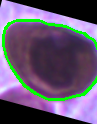

-1

In [14]:
sample_for_rotation = "Dyskeratotic/im_Dyskeratotic/CROPPED/212_01.bmp"
image_for_rotation = cv2.imread(sample_for_rotation)
polygon_points_for_rot = read_polygon_dat(sample_for_rotation.replace(".bmp", "_cyt.dat"))
# Rotate image and polygon
rotated_img = rotate_image(image_for_rotation, angle=255)
rotated_poly = rotate_polygon(polygon_points_for_rot, angle=255, image_shape=image_for_rotation.shape)

# Draw polygon on image (convert points to int here)
overlay = rotated_img.copy()
pts = np.array(rotated_poly, dtype=np.int32)
cv2.polylines(overlay, [pts], isClosed=True, color=(0, 255, 0), thickness=2)
from google.colab.patches import cv2_imshow
cv2_imshow(overlay)
cv2.waitKey(0)

In [15]:
import shutil
def combine_files(root_path_list, verbose=True):
    """
    Combines images and polygon files from CROPPED and AUGMENTED folders
    into a COMBINED folder, preserving metadata.

    Args:
        root_path_list (list): List of root folder paths.
        verbose (bool): If True, prints processing info.
    """
    pattern = re.compile(r"^\d+_\d+(_[a-zA-Z0-9]+)?(\.bmp|_cyt\.dat|_nuc\.dat)$")  # Match files like 001_01_flipH.bmp, 001_01_rot90.bmp or 023_04_cyt.dat

    for root_path in root_path_list:
        folder_name = os.path.basename(root_path.rstrip('/'))
        cropped_folder = os.path.join(root_path, f"im_{folder_name}", "CROPPED")
        augmented_folder = os.path.join(root_path, f"im_{folder_name}", "AUGMENTED")
        combined_folder = os.path.join(root_path, f"im_{folder_name}", "COMBINED")

        if not os.path.exists(cropped_folder):
            print(f"⚠️ Skipping missing CROPPED folder: {cropped_folder}")
            continue

        os.makedirs(combined_folder, exist_ok=True)

        # Helper to copy from source to combined folder
        def copy_matching_files(source_folder, label):
            copied = 0
            for fname in os.listdir(source_folder):
                if pattern.match(fname):
                    src = os.path.join(source_folder, fname)
                    dst = os.path.join(combined_folder, fname)
                    shutil.copy2(src, dst)
                    copied += 1
            if verbose:
                print(f"📂 Copied {copied} files from {label}")

        # Copy from both folders
        copy_matching_files(cropped_folder, "CROPPED")
        copy_matching_files(augmented_folder, "AUGMENTED")

        print(f"✅ COMBINED folder ready: {combined_folder}")

combine_files(root_folder_path)

📂 Copied 2493 files from CROPPED
📂 Copied 3846 files from AUGMENTED
✅ COMBINED folder ready: Superficial-Intermediate/im_Superficial-Intermediate/COMBINED
📂 Copied 2361 files from CROPPED
📂 Copied 3663 files from AUGMENTED
✅ COMBINED folder ready: Parabasal/im_Parabasal/COMBINED
📂 Copied 2475 files from CROPPED
📂 Copied 3783 files from AUGMENTED
✅ COMBINED folder ready: Koilocytotic/im_Koilocytotic/COMBINED
📂 Copied 2379 files from CROPPED
📂 Copied 3708 files from AUGMENTED
✅ COMBINED folder ready: Metaplastic/im_Metaplastic/COMBINED
📂 Copied 2439 files from CROPPED
📂 Copied 3687 files from AUGMENTED
✅ COMBINED folder ready: Dyskeratotic/im_Dyskeratotic/COMBINED


# 5. Combine to a dataset

The goal is to end up with a dataset in the following format

```bash
Clean_Data/
│
├── Training_Data/
│   ├── Images/
│   │   ├── 001_01.bmp
│   │   ├── ...
│   │   ├── xxx_xx.bmp
│   │
│   ├── Masks/           # Corresponding segmentation masks
│   │   ├── 001_01_nuc.bmp  # Nucleus mask
│   │   ├── 001_01_cyt.bmp  # Cytoplasm mask
|   |
│   ├── Labels.txt
│   │   ├── superficial-intermediate
│   │   ├── ...
│   │   ├── Koliocytotic
│   │   ├── ...
│   │   ├── Parabasal
│   │   ├── ...
│   │   ├── Metaplastic
│   │   ├── ...
│   │   ├── Dyskeratotic
│
├── Validation_Data/
│   ├── Images/
│   │   ├── 001_01.bmp
│   │   ├── ...
│   │   ├── xxx_xx.bmp
│   │
│   ├── Masks/
│   │   ├── 001_01_nuc.bmp
│   │   ├── 001_01_cyt.bmp
│   │
│   ├── Labels.txt
│   │   ├── superficial-intermediate
│   │   ├── ...
│   │   ├── Koliocytotic
│   │   ├── ...
│   │   ├── Parabasal
│   │   ├── ...
│   │   ├── Metaplastic
│   │   ├── ...
│   │   ├── Dyskeratotic
|
├── Test_Data/
│   ├── Images/
│   │   ├── 001_01.bmp
│   │   ├── ...
│   │   ├── xxx_xx.bmp
│   │
│   ├── Masks/
│   │   ├── 001_01_nuc.bmp
│   │   ├── 001_01_cyt.bmp
│   │
│   ├── Labels.txt
│   │   ├── superficial-intermediate
│   │   ├── ...
│   │   ├── Koliocytotic
│   │   ├── ...
│   │   ├── Parabasal
│   │   ├── ...
│   │   ├── Metaplastic
│   │   ├── ...
│   │   ├── Dyskeratotic
  
```


# Creating Masks

## what are masks
A mask in image data is **a binary** or **labeled image** that indicates the regions of interest in the original image. It is commonly used in `image segmentation tasks` where the goal is to identify and separate specific objects or structures from the background.

## what are they used for

1. **Object Segmentation**: Helps a model understand which pixels belong to an object and which do not.
2. **Ground Truth for Training**: Masks serve as labels for training deep learning models like U-Net.
3. **Feature Highlighting**: Can be used to isolate cells, lesions, or specific structures in medical imaging.

## Types

### Binary Mask (Black & White)

- Used for segmentation (e.g., cell detection).

- Pixels are either 0 (background) or 1 (object).

*Example*: Identifying malaria-infected blood cells.

### Grayscale Mask (Shades of Gray)

- Each pixel has an intensity value between 0-255 (or 0-1 when normalized).

- Used in medical imaging to show probabilities of regions being an object.

### Colored Mask (Multi-Class Segmentation)

- Each object class has a different color.

*Example*:

1. Red (255,0,0) → Nucleus

2. Green (0,255,0) → Cytoplasm

3. Blue (0,0,255) → Background

In [16]:
def create_mask_from_dat(image_path, dat_path, save_path, mask_size=(256, 256)):
    """
    Creates a binary mask from .dat file containing polygon coordinates.

    Args:
        image_path (str): Path to the original image (to get dimensions).
        dat_path (str): Path to the .dat file containing polygon coordinates.
        save_path (str): Path to save the generated mask.
        mask_size (tuple): The desired output mask size.

    Returns:
        None (Saves the mask as a .bmp file).
    """

    # Check if image exists
    if not os.path.exists(image_path):
        print(f"⚠️ Warning: Image not found - {image_path}")
        return

    # Check if .dat file exists
    if not os.path.exists(dat_path):
        print(f"⚠️ Warning: Dat file not found - {dat_path}")
        return

    # Load image to get dimensions
    img = cv2.imread(image_path)
    if img is None:
        print(f"❌ Error: Cannot load image {image_path}")
        return

    height, width = img.shape[:2]

    # Create a blank mask
    mask = np.zeros((height, width), dtype=np.uint8)

    # Read polygon coordinates from .dat file
    points = []
    with open(dat_path, 'r') as f:
        for line in f:
            coords = line.strip().split(',')
            if len(coords) == 2:
                try:
                    x, y = map(float, coords)  # Convert to float
                    points.append((int(x), int(y)))  # Convert to int for OpenCV
                except ValueError:
                    print(f"⚠️ Skipping invalid line: {line.strip()}")

    # Debug: Print extracted points
    print(f"Extracted {len(points)} polygon points from {dat_path}")

    if not points:
        print(f"❌ Error: No valid points found in {dat_path}. Mask cannot be created.")
        return

    # Convert points to numpy array
    polygon = np.array(points, np.int32).reshape((-1, 1, 2))

    # Draw filled polygon on mask
    cv2.fillPoly(mask, [polygon], 255)

    # Resize mask to match training dimensions
    mask = cv2.resize(mask, mask_size)

    # # Debug: Show mask
    # from google.colab.patches import cv2_imshow
    # cv2_imshow(mask)

    # Ensure the save directory exists
    os.makedirs(os.path.dirname(save_path), exist_ok=True)

    # Save mask
    success = cv2.imwrite(save_path, mask)
    if success:
        print(f"✅ Mask saved successfully at: {save_path}")
    else:
        print(f"❌ Error: Failed to save mask at {save_path}")


✅ Found: /content/Koilocytotic/im_Koilocytotic/COMBINED/001_01_flipH.bmp
Extracted 22 polygon points from /content/Koilocytotic/im_Koilocytotic/COMBINED/001_01_nuc.dat
✅ Mask saved successfully at: /content/Koilocytotic/im_Koilocytotic/COMBINED/001_01_nuc.bmp
Extracted 59 polygon points from /content/Koilocytotic/im_Koilocytotic/COMBINED/001_01_cyt.dat
✅ Mask saved successfully at: /content/Koilocytotic/im_Koilocytotic/COMBINED/001_01_cyt.bmp
Extracted 22 polygon points from /content/Koilocytotic/im_Koilocytotic/COMBINED/001_01_flipH_nuc.dat
✅ Mask saved successfully at: /content/Koilocytotic/im_Koilocytotic/COMBINED/001_01_flipH_nuc.bmp
Extracted 59 polygon points from /content/Koilocytotic/im_Koilocytotic/COMBINED/001_01_flipH_cyt.dat
✅ Mask saved successfully at: /content/Koilocytotic/im_Koilocytotic/COMBINED/001_01_flipH_cyt.bmp




Cell


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
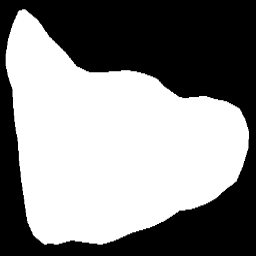

In [17]:
base_path = "/content/Koilocytotic/im_Koilocytotic/COMBINED"
base_name = "001_01"
cropped_img_001_01 = f"{base_path}/{base_name}.bmp"
cropped_img_001_01_aug = None
suffixes = ["_flipH", "_flipV", "_rot45", "_rot90", "_rot135", "_rot180", "_rot225", "_rot270"]

for suffix in suffixes:
    candidate_path = f"{base_path}/{base_name}{suffix}.bmp"
    if os.path.exists(candidate_path):
        cropped_img_001_01_aug = candidate_path
        print(f"✅ Found: {cropped_img_001_01_aug}")
        break
    else:
        print(f"❌ File not found: {candidate_path}")

nuc_dat = f"{cropped_img_001_01[:-4]}_nuc.dat"
cyt_dat = f"{cropped_img_001_01[:-4]}_cyt.dat"

if cropped_img_001_01_aug:
    nuc_dat_aug = f"{cropped_img_001_01_aug[:-4]}_nuc.dat"
    cyt_dat_aug = f"{cropped_img_001_01_aug[:-4]}_cyt.dat"
else:
    nuc_dat_aug = None
    cyt_dat_aug = None


# Define mask save paths
nucleus_mask_path = f"{cropped_img_001_01[:-4]}_nuc.bmp"
cytoplasm_mask_path = f"{cropped_img_001_01[:-4]}_cyt.bmp"
nucleus_mask_path_aug = f"{cropped_img_001_01_aug[:-4]}_nuc.bmp"
cytoplasm_mask_path_aug = f"{cropped_img_001_01_aug[:-4]}_cyt.bmp"


# Generate and save masks
create_mask_from_dat(cropped_img_001_01, nuc_dat, nucleus_mask_path)
create_mask_from_dat(cropped_img_001_01, cyt_dat, cytoplasm_mask_path)
create_mask_from_dat(cropped_img_001_01_aug, nuc_dat_aug, nucleus_mask_path_aug)
create_mask_from_dat(cropped_img_001_01_aug, cyt_dat_aug, cytoplasm_mask_path_aug)

# from google.colab.patches import cv2_imshow
print(f"\n\n\n\nCell")
cv2.imread(cytoplasm_mask_path)


In [18]:
print(f"\n\nNucleus")
cv2.imread("/content/Disposables/Training_Data/Masks/001_01_nuc.bmp")



Nucleus


# AUGMENTED_MASKS

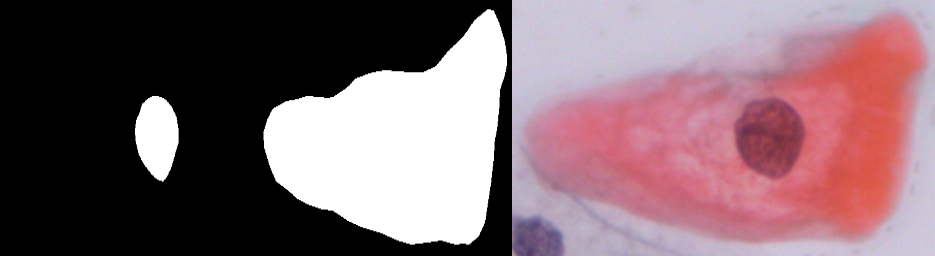

In [19]:
from google.colab.patches import cv2_imshow
import numpy as np

# Read the images
nucleus_mask = cv2.imread(nucleus_mask_path_aug)
cytoplasm_mask = cv2.imread(cytoplasm_mask_path_aug)
cropped_img = cv2.imread(cropped_img_001_01_aug)

# Ensure all images have the same height (resize if necessary)
height = max(nucleus_mask.shape[0], cytoplasm_mask.shape[0], cropped_img.shape[0])
nucleus_mask = cv2.resize(nucleus_mask, (int(nucleus_mask.shape[1] * height / nucleus_mask.shape[0]), height))
cytoplasm_mask = cv2.resize(cytoplasm_mask, (int(cytoplasm_mask.shape[1] * height / cytoplasm_mask.shape[0]), height))
cropped_img = cv2.resize(cropped_img, (int(cropped_img.shape[1] * height / cropped_img.shape[0]), height))

# Concatenate images horizontally
combined_img = np.hstack((nucleus_mask, cytoplasm_mask, cropped_img))

# Display the combined image
cv2_imshow(combined_img)
cv2.waitKey(0)  # Wait until a key is pressed
cv2.destroyAllWindows()

In [20]:
from PIL import Image


image_path = "/content/Disposables/Training_Data/Masks/001_01_nuc.bmp"

try:
    # Open the image
    img = Image.open(image_path)

    # Convert the image to a NumPy array (if needed)
    img_array = np.array(img)

    # Now you can work with the image data (img or img_array)
    print(f"Image shape: {img_array.shape}") #print the shape of the array
    print(f"Image mode: {img.mode}") #print the color mode of the image.

    # Example: Display the image (if you have a display environment)
    # img.show()

except FileNotFoundError:
    print(f"Error: Image file not found at {image_path}")
except Exception as e:
    print(f"An error occurred: {e}")

Error: Image file not found at /content/Disposables/Training_Data/Masks/001_01_nuc.bmp


## 5.1 Counting Combined Images in Each Cell Type Folder

To ensure the robustness and fairness of my deep learning model, I am counting the number of cropped images in each cell type folder. This step is critical for maintaining a balanced dataset, which directly impacts the model's ability to generalize and perform well across all cell types.

### Why is this important?

1. **Preventing Bias:** If one cell type (e.g., parabasal) has significantly more images than others, the model may become biased toward that cell type. This happens because the model learns to prioritize features associated with the more frequently seen class, leading to poor performance on underrepresented classes.

2. **Proportional Distribution:** Ensuring a proportional distribution of images across all cell types helps the model learn to discriminate between classes equally well. For example, if parabasal cells dominate the dataset, the model might excel at identifying parabasal cells but struggle with other cell types (e.g., superficial or intermediate cells) due to their lower representation.

3. **Balanced Training:** A balanced dataset allows the model to generalize better, improving its ability to correctly classify all cell types during inference, even in real-world scenarios where the distribution of cell types may vary.

### Example Scenario
> If the dataset contains `1,000 parabasal cell` images but only `100 images of another cell type` (e.g., intermediate cells), the model might achieve high accuracy for parabasal cells but perform poorly on intermediate cells. This imbalance could lead to misleadingly high overall accuracy while failing to meet the practical needs of the application.

By counting and balancing the number of cropped images per cell type, I aim to create a more equitable training environment, ensuring the model performs reliably across all classes.



In [21]:
def count_combined_images(root_directories):
    """
    Counts the number of cropped images in each 'Cropped' folder within the specified root directories.

    Only considering images with names in the format 'xxx_xx.bmp' where both 'xxx' and 'xx' are numbers.

    Args:
        root_directories (list): A list of primary folder directories
                                 (e.g., ["Superficial-Intermediate", "Parabasal", ...]).

    Returns:
        dict: A dictionary with the primary folder name as the key and the number of cropped images as the value.
    """
    cropped_counts = {}
    valid_pattern = re.compile(r"^\d+_\d+(_[a-zA-Z0-9]+)?(\.bmp|_cyt\.dat|_nuc\.dat)$")

    for root_dir in root_directories:
        cropped_folder = os.path.join(root_dir, f"im_{root_dir}", "COMBINED")

        if not os.path.exists(cropped_folder):
            print(f"Skipping {root_dir} - No Cropped folder found.")
            cropped_counts[root_dir] = 0
            continue

        # Count only .bmp images in the Cropped folder
        image_count = len([f for f in os.listdir(cropped_folder) if valid_pattern.match(f)])
        cropped_counts[root_dir] = image_count

    return cropped_counts

In [22]:
cropped_image_counts = count_combined_images(root_folder_path)
total = sum(cropped_image_counts.values())
# Print the results
for category, count in cropped_image_counts.items():
    print(f"{category}: {count} cropped images\n\t\tAs a percentage: {round(count/total, 1)}")

Superficial-Intermediate: 6339 cropped images
		As a percentage: 0.2
Parabasal: 6024 cropped images
		As a percentage: 0.2
Koilocytotic: 6260 cropped images
		As a percentage: 0.2
Metaplastic: 6087 cropped images
		As a percentage: 0.2
Dyskeratotic: 6126 cropped images
		As a percentage: 0.2


## 5.2 Confirm All Images Are Cropped

To maintain consistency and accuracy in my dataset, I am verifying that all images have been cropped according to the dimensions specified in the .dat polygon files. This step ensures that each image is properly aligned with the annotated regions of interest, which is crucial for training the deep learning model effectively.

### Why is this important?

1. **Consistency in Data Preprocessing**: Cropping images based on the .dat polygon dimensions ensures that all images are uniformly processed. This consistency is vital for the model to learn meaningful patterns and features from the data.

2. **Accurate Representation of Cell Types**: Proper cropping guarantees that the model focuses on the relevant regions of the images, avoiding unnecessary background noise or irrelevant information. This improves the model's ability to accurately identify and classify cell types.

3. **Validation of Dataset Integrity**: By confirming that all images are cropped, I can ensure the dataset is complete and ready for training. This step also helps identify any potential issues, such as missing or incorrectly cropped images, which could negatively impact model performance.

### Dataset Snapshot Overview

Below is a summary of the current dataset, including the number of cell snapshots and the number of cells in the last snapshot for each cell type:

|Cell type|# cell snapshots|# cells in last snapshot|
|:---|:---|:---:|
|Dyskeratotic|223|03|
|Koilocytotic|238|02|
|Metaplastic|271|04|
|Parabasal|108|03|
|Superficial-Intermediate|126|07|

This table provides a clear overview of the dataset's composition, ensuring transparency and helping to identify any imbalances or inconsistencies that may need addressing before training the model.

In [23]:
dyskeratotic_all_img =os.path.isfile("/content/Dyskeratotic/im_Dyskeratotic/COMBINED/223_03.bmp")
koilocytotic_all_img =os.path.isfile("/content/Koilocytotic/im_Koilocytotic/COMBINED/238_02.bmp")
metaplastic_all_img =os.path.isfile("/content/Metaplastic/im_Metaplastic/COMBINED/271_04.bmp")
parabasal_all_img =os.path.isfile("/content/Parabasal/im_Parabasal/COMBINED/108_03.bmp")
superficial_inter_all_img =os.path.isfile("/content/Superficial-Intermediate/im_Superficial-Intermediate/COMBINED/126_07.bmp")

print(f"""All files in \nDyskeratotic are cropped, {dyskeratotic_all_img}
      \nKoilocytotic are cropped, {koilocytotic_all_img}
      \nMetaplastic are cropped, {metaplastic_all_img}
      \nParabasal are cropped, {parabasal_all_img}
      \nSuperficial-Intermediate are cropped, {superficial_inter_all_img}""")

All files in 
Dyskeratotic are cropped, True
      
Koilocytotic are cropped, True
      
Metaplastic are cropped, True
      
Parabasal are cropped, True
      
Superficial-Intermediate are cropped, True


# 5.3 Organise the data into a balanced dataset

## Real-World Considerations
Superficial and Intermediate cells naturally dominate Pap smears — that's expected.

Koilocytotic and Dyskeratotic cells are less common but more diagnostically significant.

Metaplastic cells are transitional and may also be less frequent.

So in real-world data, you often see something more like:

|Cell Type|Count|
|:----|:----:|
|Superficial-Intermediate|50–60%|
|Parabasal|10–15%|
|Koilocytotic|10–15%|
|Dyskeratotic|5–10%|
|Metaplastic|5–10%|

## Refernce

Win, K. P., Kitjaidure, Y., Hamamoto, K., & Myo Aung, T. (2020).

&emsp;Computer-Assisted Screening for Cervical Cancer Using Digital

&emsp; Image Processing of Pap Smear Images. Applied Sciences, 10(5),
&emsp; 1800. https://doi.org/10.3390/app10051800

# This needs to be maintained when combining the images

in this case

> The ratio is slightly uniform but as data quantity is the goal there will no longer be a need to size down the dataset
>

In [24]:
import shutil
import random

def organize_balanced_clean_data(root_directories, clean_data_path="/content/Clean_Data", split_ratio=(0.7, 0.2, 0.1)):
    """
    Organizes images from cropped folders into Clean_Data with a balanced dataset.

    Args:
        root_directories (list): List of primary folder directories (e.g., ["Superficial-Intermediate", "Parabasal", ...]).
        clean_data_path (str): Destination folder for structured data.
        split_ratio (tuple): Train, validation, and test split percentages.

    Ensures:
        - The dataset is **balanced** by limiting the dominant classes to match the minority class.
        - Each dataset type (Training, Validation, Test) gets an equal proportion of images.
    """

    # Create Clean_Data directory and subfolders
    dataset_types = ["Training_Data", "Validation_Data", "Test_Data"]
    for dataset in dataset_types:
        dataset_path = os.path.join(clean_data_path, dataset)
        os.makedirs(os.path.join(dataset_path, "Images"), exist_ok=True)
        os.makedirs(os.path.join(dataset_path, "Masks"), exist_ok=True)

    # # Count available cropped images per class
    # cropped_counts = count_cropped_images(root_directories)

    # # Determine the **minimum** number of images among all cell types (for balancing)
    # min_images = min(cropped_counts.values())

    # print(f"📊 Balancing dataset to {min_images} images per class to prevent bias.")

    # Store label info
    label_files = {dataset: [] for dataset in dataset_types}

    for root_dir in root_directories:
        cropped_folder = os.path.join(root_dir, f"im_{root_dir}", "COMBINED")

        if not os.path.exists(cropped_folder):
            print(f"⚠️ Skipping {root_dir} - No Cropped folder found.")
            continue

        # Get all images in the Cropped folder, ensuring we only use `xxx_xx.bmp` format
        images = [f for f in os.listdir(cropped_folder) if f.endswith(".bmp") and "_" in f and f.split("_")[0].isdigit()]

        # Randomly sample `min_images` to balance the dataset
        random.shuffle(images)
        # balanced_images = images[:min_images]  # Ensures all classes have the same number of images
        balanced_images = images # all the images are used

        # Split dataset
        total = len(balanced_images)
        train_split = int(split_ratio[0] * total)
        val_split = int(split_ratio[1] * total)

        train_files = balanced_images[:train_split]
        val_files = balanced_images[train_split:train_split + val_split]
        test_files = balanced_images[train_split + val_split:]

        # Assign each set to corresponding directory
        dataset_mapping = {
            "Training_Data": train_files,
            "Validation_Data": val_files,
            "Test_Data": test_files
        }

        for dataset, files in dataset_mapping.items():
            dataset_path = os.path.join(clean_data_path, dataset, "Images")
            mask_path = os.path.join(clean_data_path, dataset, "Masks")

            for img in files:
                src_path = os.path.join(cropped_folder, img)
                dst_path = os.path.join(dataset_path, img)
                shutil.copy(src_path, dst_path)  # Copy image to new location

                nuc_dat = src_path.replace(".bmp", "_nuc.dat")
                cyt_dat = src_path.replace(".bmp", "_cyt.dat")
                nuc_mask = os.path.join(mask_path, img.replace(".bmp", "_nuc.bmp"))
                cyt_mask = os.path.join(mask_path, img.replace(".bmp", "_cyt.bmp"))

                create_mask_from_dat(src_path, nuc_dat, nuc_mask)
                create_mask_from_dat(src_path, cyt_dat, cyt_mask)

                # Store label info (format: "image_name label")
                label_files[dataset].append(f"{img} {root_dir}")

    # Write Labels.txt for each dataset
    for dataset in dataset_types:
        label_txt_path = os.path.join(clean_data_path, dataset, "Labels.txt")
        with open(label_txt_path, "w") as f:
            f.write("\n".join(label_files[dataset]))

    print("✅ Data Organization Complete!")

In [25]:
organize_balanced_clean_data(root_folder_path)

Streaming output truncated to the last 5000 lines.
✅ Mask saved successfully at: /content/Clean_Data/Training_Data/Masks/139_03_nuc.bmp
Extracted 15 polygon points from Dyskeratotic/im_Dyskeratotic/COMBINED/139_03_cyt.dat
✅ Mask saved successfully at: /content/Clean_Data/Training_Data/Masks/139_03_cyt.bmp
Extracted 33 polygon points from Dyskeratotic/im_Dyskeratotic/COMBINED/164_08_rot90_nuc.dat
✅ Mask saved successfully at: /content/Clean_Data/Training_Data/Masks/164_08_rot90_nuc.bmp
Extracted 46 polygon points from Dyskeratotic/im_Dyskeratotic/COMBINED/164_08_rot90_cyt.dat
✅ Mask saved successfully at: /content/Clean_Data/Training_Data/Masks/164_08_rot90_cyt.bmp
Extracted 14 polygon points from Dyskeratotic/im_Dyskeratotic/COMBINED/221_02_flipH_nuc.dat
✅ Mask saved successfully at: /content/Clean_Data/Training_Data/Masks/221_02_flipH_nuc.bmp
Extracted 14 polygon points from Dyskeratotic/im_Dyskeratotic/COMBINED/221_02_flipH_cyt.dat
✅ Mask saved successfully at: /content/Clean_Data/Tr

# 6. Implementation

## 6.1 Import Libraries

In [26]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

## 6.2 Load the Dataset

### Goal when loading the dataset

|Step| Completion Status|
|:----|:----:|
|Load Cropped Images from the Clean_Data directory| ✅|
|Convert images to grayscale (if needed)| ❌|
|Normalize pixel values to [0,1]| ❌|
|Create corresponding segmentation masks (if available)| ❌|
|Split data into training, validation, and test sets| ✅|

### Why Keep RGB

**1. Color information is crucial for classification & segmentation**

- Different stains (e.g., eosinophilic = pink, cyanophilic = blue) provide biological context.

- Grayscale conversion removes this key distinguishing factor.

**2. Preserves stain intensity variations**

- Some cells have darker cytoplasmic regions or lighter perinuclear areas, which are better captured in RGB.

**3. Maintains contrast for nucleus & cytoplasm segmentation**

- The difference in staining (e.g., a dark blue nucleus vs. a pink cytoplasm) improves segmentation accuracy.

**4. Deep Learning models can handle 3-channel (RGB) images well**

- A U-Net model trained on RGB images will likely perform better on this task.


In [27]:
CLEAN_DATA_PATH = "/content/Clean_Data"
IMG_SIZE = (256, 256) # resize the images

In [28]:
from tensorflow.keras.utils import Sequence

class ImageMaskDataGenerator(Sequence):
    def __init__(self, clean_data_path, dataset_type="Training_Data", batch_size=32, img_size=(256, 256), shuffle=True):
        self.dataset_path = os.path.join(clean_data_path, dataset_type, "Images")
        self.mask_path_base = os.path.join(clean_data_path, dataset_type, "Masks")
        self.image_files = [f for f in os.listdir(self.dataset_path) if f.endswith(".bmp")]
        self.batch_size = batch_size
        self.img_size = img_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(self.image_files))
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.image_files) / self.batch_size))

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __getitem__(self, index):
        # Get batch indices
        batch_indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        batch_files = [self.image_files[i] for i in batch_indexes]

        # Load batch data
        X = np.empty((len(batch_files), *self.img_size, 3), dtype=np.float32)
        Y = np.empty((len(batch_files), *self.img_size, 1), dtype=np.float32)

        for i, fname in enumerate(batch_files):
            img_path = os.path.join(self.dataset_path, fname)
            mask_path = os.path.join(self.mask_path_base, fname)

            img = cv2.imread(img_path, cv2.IMREAD_COLOR)
            img = cv2.resize(img, self.img_size) / 255.0

            if os.path.exists(mask_path):
                mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
                mask = cv2.resize(mask, self.img_size) / 255.0
            else:
                mask = np.zeros(self.img_size, dtype=np.float32)

            X[i] = img
            Y[i, ..., 0] = mask

        return X, Y


## Loading the Data

In [29]:
# Create generators
train_gen = ImageMaskDataGenerator(
    clean_data_path=CLEAN_DATA_PATH,
    dataset_type="Training_Data",
    batch_size=16,
    img_size=(256, 256)
)

val_gen = ImageMaskDataGenerator(
    clean_data_path=CLEAN_DATA_PATH,
    dataset_type="Validation_Data",
    batch_size=16,
    img_size=(256, 256),
    shuffle=False
)

test_gen = ImageMaskDataGenerator(
    clean_data_path= CLEAN_DATA_PATH,
    dataset_type="Test_Data",
    batch_size=16,
    img_size=(256, 256),
    shuffle=False
)

# 6.3 Train U-Net Model: Use U-Net for cell segmentation.

## Real Example

Imagine you have a `blurry picture` of your favorite cartoon character, and you want to `trace their outline perfectly on a new sheet of paper`. U-Net helps computers do something similar—but with images like medical scans, satellite photos, or even selfies!

![dog](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse3.mm.bing.net%2Fth%3Fid%3DOIP.5sT6l_tVKcno7AUVRzdJYAHaFP%26pid%3DApi&f=1&ipt=78c44ea0550ac94d2a544fcc09f6ab40ffb1bae459120341b80b5754fd368a62&ipo=images)

## How it works

1. **The "U" Shape** - The model is called U-Net because its structure looks like the letter "U". It has two main parts:

&emsp; &emsp; &emsp; &emsp; 🔽 Downside (Encoder): Shrinks the image step by step to understand the big picture (like seeing a faraway object).

&emsp; &emsp; &emsp; &emsp; 🔼 Upside (Decoder): Expands it back while keeping important details (like zooming in with a magnifying glass).

2. **Skip Connections** - These are like shortcuts that help the model remember small details (like edges or spots) even after shrinking the image.

3. **Final Output** - The U-Net gives a new image where it highlights what it found important (like coloring only the outline of a tumor in an X-ray).

### Example

Finding a Cat in a Photo
> 1. **Input** You give the U-Net a messy picture of a cat in a garden.
>
> 2. **Downside** It blurs the image a little to see "cat-shaped" blobs.
>
> 3. **Upside** It sharpens the image again but keeps only the cat part clear.
>
> 4. **Output** Now you get a new image where only the cat is colored, and the rest is ignored!

### Why Is It Useful?
- Doctors use it to spot diseases in X-rays.

- Scientists use it to track forests in satellite images.

- It’s great at focusing on important parts without getting distracted.



In [30]:
from tensorflow.keras import layers, models

# Model accuracy too high

The model seemed to be overfitting

```bash
Epoch 1/28
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 256, 256, 3))
  warnings.warn(msg)
331/331 ━━━━━━━━━━━━━━━━━━━━ 249s 634ms/step - accuracy: 0.9988 - loss: 14.4489 - val_accuracy: 1.0000 - val_loss: 3.2794e-08
Epoch 2/28
331/331 ━━━━━━━━━━━━━━━━━━━━ 165s 498ms/step - accuracy: 0.9999 - loss: 0.0065 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 3/28
331/331 ━━━━━━━━━━━━━━━━━━━━ 162s 491ms/step - accuracy: 0.9997 - loss: 0.3323 - val_accuracy: 1.0000 - val_loss: 5.1745e-09
Epoch 4/28
331/331 ━━━━━━━━━━━━━━━━━━━━ 162s 490ms/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 1.0000 - val_loss: 0.0212
Epoch 5/28
331/331 ━━━━━━━━━━━━━━━━━━━━ 162s 490ms/step - accuracy: 1.0000 - loss: 0.0120 - val_accuracy: 1.0000 - val_loss: 1.3129e-08
Epoch 6/28
331/331 ━━━━━━━━━━━━━━━━━━━━ 162s 491ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 2.3194e-04
Epoch 7/28
331/331 ━━━━━━━━━━━━━━━━━━━━ 165s 499ms/step - accuracy: 0.9999 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 1.1088e-06
Epoch 8/28
290/331 ━━━━━━━━━━━━━━━━━━━━ 18s 448ms/step - accuracy: 0.9997 - loss: 0.0149
```

## Potential augmentations

### 1. Add Dropout
Dropout helps prevent memorization. You can add Dropout layers after convolutions, especially in the bottleneck and decoder.

```python
# Bottleneck (with dropout)
c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
c3 = layers.Dropout(0.5)(c3)
c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
```

### 2. Use Data Augmentation
Apply the following:

- Rotation
- Flip
- Brightness/contrast
- Zoom or small elastic distortions

Augment both images and masks identically!

### 3. Add Batch Normalization
Batch norm helps generalization and stabilizes training.

usually Added after each Conv2D block:

```python
c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
c1 = layers.BatchNormalization()(c1)
c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
c1 = layers.BatchNormalization()(c1)
```

### 4. Use Early Stopping
Stop training as soon as validation loss starts increasing.

```python
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

model.fit(train_gen, validation_data=val_gen, epochs=50, callbacks=[early_stopping])
```

### 5. Switch to Dice Loss or Combo Loss
For segmentation, `binary_crossentropy` can be **too lenient**. Try Dice loss or a combination:

```python
def dice_loss(y_true, y_pred, smooth=1e-6):
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return 1 - (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)

model.compile(optimizer='adam', loss=dice_loss, metrics=['accuracy'])
```

### 6. Reduce Model Capacity
If the dataset is small and clean, a large model (with many filters) may overfit.

Solutions are:

- Starting with 32 filters instead of 64
- Reducing the bottleneck depth
- Using a lightweight encoder like MobileNetV2 (doing too much ?)

### 7. Smaller Learning Rate
Lowering the learning rate often helps with generalization:

```python
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
```

# My decision

|Priority|What to Do|Why ?|
|:----:|:----|:----|
|✅|Add dropout|Reduce memorization|
|✅|Use batch normalization|Better generalization|
|✅|Apply strong data augmentation|More robust training|
|✅|Use early stopping|Prevent wasted overfitting|
|✅|Try Dice loss|Better for segmentation|
|✅|Reduce learning rate|Smoother convergence|
|⬇️|Reduce model capacity|Only if dataset is very small|

## Trial One

1. Batch Normalization after each Conv2D
2. Dropout in the bottleneck and decoder
3. An optional Dice loss function you can plug into your model.compile()



In [31]:
def unet_model(input_shape):
    inputs = tf.keras.Input(shape=input_shape)

    # Encoder
    c1 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(inputs) # 64 -> 32 to account for "small data"
    c1 = layers.BatchNormalization()(c1)
    c1 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(c1)
    c1 = layers.BatchNormalization()(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(p1) # 128 -> 64 to account for "small data"
    c2 = layers.BatchNormalization()(c2)
    c2 = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(c2)
    c2 = layers.BatchNormalization()(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    # Bottleneck
    c3 = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(p2) #  256 -> 128 to account for "small data"
    c3 = layers.BatchNormalization()(c3)
    c3 = layers.Dropout(0.5)(c3)
    c3 = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(c3)
    c3 = layers.BatchNormalization()(c3)

    # Decoder
    u4 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c3) # 128 -> 64 to account for "small data"
    u4 = layers.concatenate([u4, c2])
    c4 = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(u4)
    c4 = layers.BatchNormalization()(c4)
    c4 = layers.Dropout(0.3)(c4)
    c4 = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(c4)
    c4 = layers.BatchNormalization()(c4)

    u5 = layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c4) # 64 -> 32 to account for "small data"
    u5 = layers.concatenate([u5, c1])
    c5 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(u5)
    c5 = layers.BatchNormalization()(c5)
    c5 = layers.Dropout(0.2)(c5)
    c5 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(c5)
    c5 = layers.BatchNormalization()(c5)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c5)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

# Compile the model

In [32]:
model = unet_model(input_shape=(256, 256, 3))  # the images are (256,256) with 3 rgb chanels
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model

In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 256, 256, 3))
  warnings.warn(msg)


 82/336 ━━━━━━━━━━━━━━━━━━━━ 2:00:18 28s/step - accuracy: 0.7166 - loss: 0.6559